## Conditional Graph

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1 : int
    operation : str
    number2: int
    finalNumber : int
    

In [4]:
def adder(state: AgentState)->AgentState:
    """This node adds 2 numbers"""
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subtractor(state: AgentState)->AgentState:
    """This node subtracts 2 numbers"""
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state:AgentState)->AgentState:
    """This node will select the next node of the graph"""
    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "subtraction_operation"

In [5]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state: state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation" : "add_node",
        "subtraction_operation": "subtract_node"
    }
)
graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

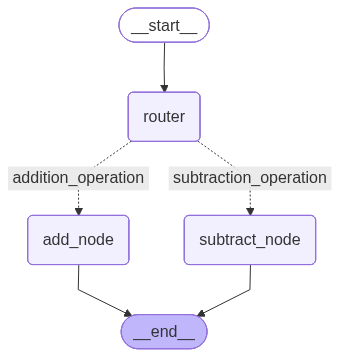

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
example_state = AgentState(number1=1, number2=3, operation="+")
print(app.invoke(example_state))

{'number1': 1, 'operation': '+', 'number2': 3, 'finalNumber': 4}


### Exercise for Graph IV

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END


In [2]:
class AgentState2(TypedDict):
    number1 : int
    number2 : int
    number3 : int
    number4: int
    operation1 : str
    operation2 : str
    finalNumber1 : int
    finalNumber2 : int

In [15]:
def adder1(state:AgentState2)-> AgentState2:
    """This node adds 2 numbers"""
    print("adder1")
    state["finalNumber1"] = state["number1"]+ state["number2"]
    return state

def subtractor1(state: AgentState2)->AgentState2:
    """This node subtracts 2 numbers"""
    state["finalNumber1"] = state["number1"] - state["number2"]
    return state

def decide_next_node1(state:AgentState2)->AgentState2:
    """This node will select the first next phase"""
    if state["operation1"] == "+":
        return "addition_operation1"
    elif state["operation1"] == "-":
        return "subtraction_operation1"
    
def adder2(state:AgentState2)->AgentState2:
    """This node will add 2 numbers"""
    state["finalNumber2"] = state["number3"] + state["number4"]
    return state

def subtractor2(state:AgentState2)->AgentState2:
    """This node will subtract 2 numbers"""
    state["finalNumber2"] = state["number3"] - state["number4"]
    return state

def decide_next_node2(state:AgentState2)->AgentState2:
    """This node will select the next phase2"""
    if state["operation2"] == "+":
        return "addition_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"

In [16]:
graph = StateGraph(AgentState2)
graph.add_node("add_node", adder1)
graph.add_node("subtract_node", subtractor1)
graph.add_node("router1", lambda state:state)

graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    decide_next_node1,
    {
        "addition_operation1" : "add_node",
        "subtraction_operation1" : "subtract_node"
    }
)
graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition_operation2" : "add_node2",
        "subtraction_operation2" : "subtract_node2",


    }
)
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()




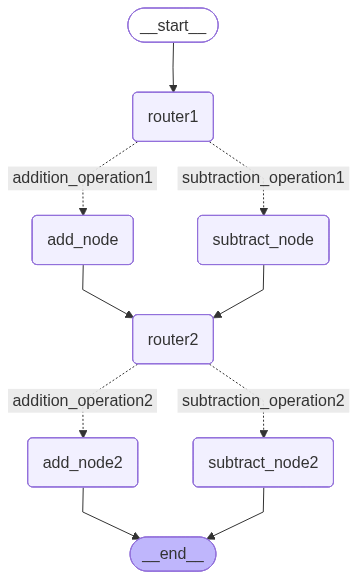

In [17]:

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
initial_state = AgentState2(number1=10, number2= 5, number3=7, number4=2, operation1="-", operation2="+", finalNumber= 0, finalNumber2 = 0)

In [19]:

print( app.invoke(initial_state))

{'number1': 10, 'number2': 5, 'number3': 7, 'number4': 2, 'operation1': '-', 'operation2': '+', 'finalNumber1': 5, 'finalNumber2': 9}
